In [8]:
import cv2
import IPython
import mediapipe as mp

In [9]:
def show_image(image):
    _, ret = cv2.imencode('.jpg', image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [19]:
img = cv2.imread('mom.jpg')

In [20]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1750521948.536288  419146 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1750521948.612913  445796 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 570.153.02), renderer: NVIDIA GeForce RTX 2070 SUPER/PCIe/SSE2
W0000 00:00:1750521948.615493  445786 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750521948.627578  445784 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


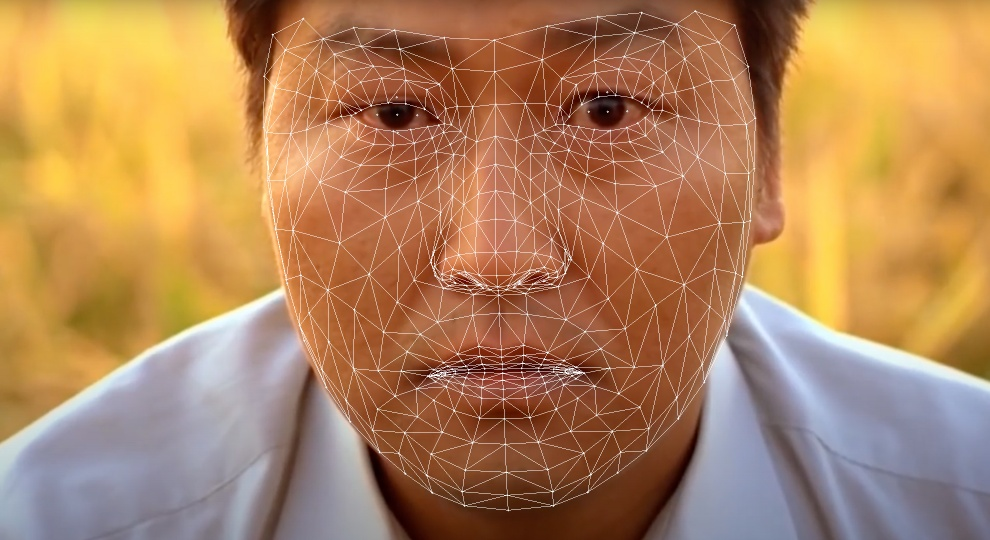

In [21]:
drawn = img.copy()
with mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
) as face_mesh:
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                drawn,
                face_landmarks,
                mp_face_mesh.FACEMESH_TESSELATION,
                mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=1, circle_radius=1),
                mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=1)
            )
h, w = img.shape[:2]
drawn = cv2.resize(drawn, (int(w/2), int(h/2)))
show_image(drawn)

In [22]:
cv2.imwrite('../docs/mom_drawn.png', drawn)

True